In [1]:
!pip install kaggle

In [2]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing Face Mask Dataset

In [3]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

 98% 160M/163M [00:01<00:00, 116MB/s]
100% 163M/163M [00:01<00:00, 129MB/s]


In [4]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


Importing the Dependencies

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [6]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_2973.jpg', 'with_mask_3140.jpg', 'with_mask_2856.jpg', 'with_mask_2396.jpg', 'with_mask_1845.jpg']
['with_mask_2239.jpg', 'with_mask_3323.jpg', 'with_mask_558.jpg', 'with_mask_2037.jpg', 'with_mask_960.jpg']


In [7]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_2144.jpg', 'without_mask_3043.jpg', 'without_mask_1631.jpg', 'without_mask_2848.jpg', 'without_mask_611.jpg']
['without_mask_3706.jpg', 'without_mask_2432.jpg', 'without_mask_3625.jpg', 'without_mask_2429.jpg', 'without_mask_1323.jpg']


In [8]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


Creating Labels for the two class of Images

with mask --> 1

without mask --> 0


In [9]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [10]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


Displaying the Images

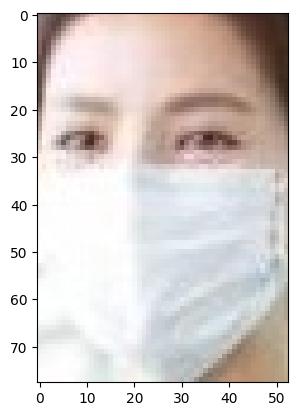

In [11]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_960.jpg')
imgplot = plt.imshow(img)
plt.show()

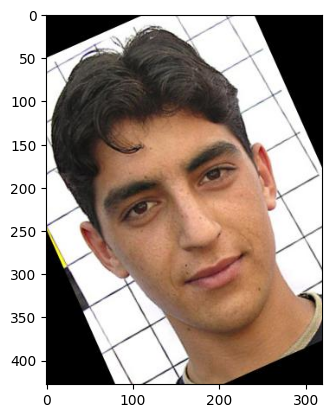

In [12]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_1323.jpg')
imgplot = plt.imshow(img)
plt.show()

Image Processing

Resize the Images

Convert the images to numpy arrays

In [13]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [14]:
data[0]

array([[[213, 209, 197],
        [213, 209, 197],
        [213, 209, 197],
        ...,
        [219, 210, 201],
        [218, 211, 201],
        [218, 211, 201]],

       [[213, 209, 197],
        [213, 209, 197],
        [213, 209, 197],
        ...,
        [218, 212, 204],
        [216, 212, 203],
        [216, 212, 203]],

       [[213, 209, 197],
        [213, 209, 197],
        [213, 209, 197],
        ...,
        [217, 213, 205],
        [215, 212, 203],
        [215, 212, 203]],

       ...,

       [[195, 172, 154],
        [198, 173, 153],
        [199, 174, 154],
        ...,
        [197, 191, 179],
        [198, 190, 179],
        [198, 190, 179]],

       [[194, 171, 153],
        [196, 172, 152],
        [198, 173, 153],
        ...,
        [197, 191, 179],
        [199, 189, 179],
        [199, 189, 179]],

       [[193, 170, 152],
        [194, 171, 150],
        [196, 171, 151],
        ...,
        [198, 191, 180],
        [199, 189, 179],
        [199, 189, 179]]

In [15]:
print(type(data[0]))
print(data[0].shape)

<class 'numpy.ndarray'>
(128, 128, 3)


In [16]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)
print(X.shape)
print(Y.shape)
print(Y)

(7553, 128, 128, 3)
(7553,)
[1 1 1 ... 0 0 0]


Train Test Split

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [18]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [19]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [20]:
X_train[0]

array([[[176, 172, 169],
        [148, 147, 144],
        [201, 200, 198],
        ...,
        [149, 188, 234],
        [146, 188, 234],
        [145, 186, 232]],

       [[174, 170, 168],
        [149, 148, 146],
        [206, 205, 203],
        ...,
        [149, 188, 235],
        [147, 188, 234],
        [146, 187, 233]],

       [[171, 167, 164],
        [151, 150, 148],
        [215, 214, 212],
        ...,
        [150, 189, 235],
        [147, 188, 234],
        [146, 187, 233]],

       ...,

       [[ 52,  50,  74],
        [ 52,  50,  72],
        [ 52,  50,  72],
        ...,
        [ 50,  51,  72],
        [ 50,  51,  72],
        [ 50,  51,  72]],

       [[ 52,  50,  72],
        [ 52,  50,  72],
        [ 52,  50,  72],
        ...,
        [ 50,  51,  72],
        [ 50,  51,  72],
        [ 50,  51,  72]],

       [[ 51,  51,  72],
        [ 51,  51,  72],
        [ 51,  51,  72],
        ...,
        [ 50,  51,  72],
        [ 50,  51,  72],
        [ 50,  51,  72]]

In [21]:
X_train_scaled[0]

array([[[0.69019608, 0.6745098 , 0.6627451 ],
        [0.58039216, 0.57647059, 0.56470588],
        [0.78823529, 0.78431373, 0.77647059],
        ...,
        [0.58431373, 0.7372549 , 0.91764706],
        [0.57254902, 0.7372549 , 0.91764706],
        [0.56862745, 0.72941176, 0.90980392]],

       [[0.68235294, 0.66666667, 0.65882353],
        [0.58431373, 0.58039216, 0.57254902],
        [0.80784314, 0.80392157, 0.79607843],
        ...,
        [0.58431373, 0.7372549 , 0.92156863],
        [0.57647059, 0.7372549 , 0.91764706],
        [0.57254902, 0.73333333, 0.91372549]],

       [[0.67058824, 0.65490196, 0.64313725],
        [0.59215686, 0.58823529, 0.58039216],
        [0.84313725, 0.83921569, 0.83137255],
        ...,
        [0.58823529, 0.74117647, 0.92156863],
        [0.57647059, 0.7372549 , 0.91764706],
        [0.57254902, 0.73333333, 0.91372549]],

       ...,

       [[0.20392157, 0.19607843, 0.29019608],
        [0.20392157, 0.19607843, 0.28235294],
        [0.20392157, 0

Building a Convolutional Neural Networks (CNN)

In [22]:
import tensorflow as tf
from tensorflow import keras

In [23]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [24]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [25]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 122s 709ms/step - loss: 0.4507 - acc: 0.8026 - val_loss: 0.3136 - val_acc: 0.8628
Epoch 2/5
170/170 [==============================] - 122s 717ms/step - loss: 0.2849 - acc: 0.8915 - val_loss: 0.2251 - val_acc: 0.9223
Epoch 3/5
170/170 [==============================] - 118s 695ms/step - loss: 0.2193 - acc: 0.9165 - val_loss: 0.2255 - val_acc: 0.9240
Epoch 4/5
170/170 [==============================] - 125s 732ms/step - loss: 0.1745 - acc: 0.9342 - val_loss: 0.1900 - val_acc: 0.9306
Epoch 5/5
170/170 [==============================] - 121s 709ms/step - loss: 0.1505 - acc: 0.9422 - val_loss: 0.2015 - val_acc: 0.9339


Model Evaluation

In [26]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 8s 162ms/step - loss: 0.2268 - acc: 0.9087
Test Accuracy = 0.9086697697639465


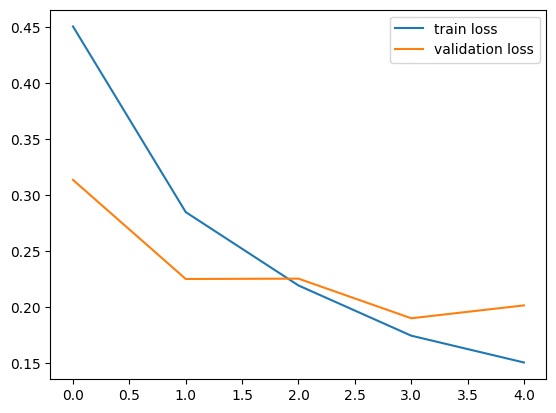

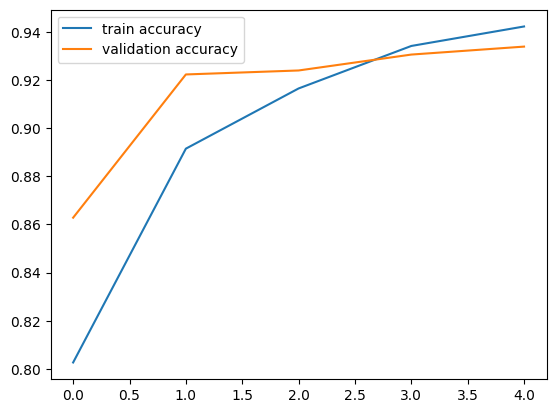

In [27]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

Predictive System

In [30]:
def predict_function():
  input_image_path = input('Path of the image to be predicted: ')

  input_image = cv2.imread(input_image_path)

  cv2_imshow(input_image)

  input_image_resized = cv2.resize(input_image, (128,128))

  input_image_scaled = input_image_resized/255

  input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

  input_prediction = model.predict(input_image_reshaped)

  print(input_prediction)


  input_pred_label = np.argmax(input_prediction)

  print(input_pred_label)


  if input_pred_label == 1:

    print('The person in the image is wearing a mask')

  else:

    print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/image1.jpeg


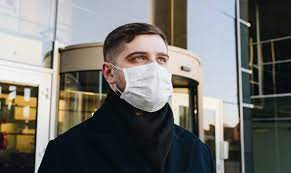

1/1 [==============================] - 0s 35ms/step
[[0.16098857 0.91666734]]
1
The person in the image is wearing a mask


In [32]:
predict_function()

Path of the image to be predicted: /content/iage2.jpeg


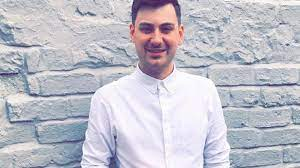

1/1 [==============================] - 0s 32ms/step
[[0.5332434 0.5031237]]
0
The person in the image is not wearing a mask


In [33]:
predict_function()
